# **Exploration of ~37200 Reddit r/jokes dataset (1)**
## Upvote ratio or reddit score: Which one is better for prediction a joke quality in reddit.com/r/jokes?
The dataset that I used is extracted and simplified from [Kaggle](https://www.kaggle.com/datasets/bwandowando/reddit-rjokes-dataset) dataset.
I chose subset of columns that I was interested in my analysis.
Here are the list of columns that I kept:
- *thread_id*: unique id of the thread containing the joke (Object)
- *thread_title*: title of the thread (Object) *sometimes this title contains start of the joke*
- *thread_selftext*: Text of the thread which includes the joke (Object)
- *thread_score*: This score between 0 and 1 (Object) *supposed to be Upvotes - downvotes but I can't see any negative values so still I don't know what is it.*
- *thread_num_comments*: Number of comments in the thread (float64)
- *thread_created_utc*: Time of the thread creation in UTC (Object)
- *thread_upvote_ratio*: Ratio of upvotes to to total votes (float64)
- *thread_over_18*: Whether the thread is over 18 or not (Object)


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# pd cosmetics
pd.set_option('display.max_colwidth', 3000)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 1000)


# Three files are in the *data* folder
# 1) reddit_jokes_slim.csv: All ~37200 jokes (clean and adult)
# 2) reddit_jokes_slim_clean.csv : Only clean jokes
# 3) reddit_jokes_slim_plus18.csv: only adult jokes
df_jokes_slim = pd.read_csv('./data/reddit_jokes_slim.csv')
df_jokes_slim.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37222 entries, 0 to 37221
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thread_id            37222 non-null  object 
 1   thread_title         37222 non-null  object 
 2   thread_selftext      37216 non-null  object 
 3   thread_score         37221 non-null  object 
 4   thread_num_comments  37221 non-null  float64
 5   thread_created_utc   37221 non-null  object 
 6   thread_upvote_ratio  37220 non-null  float64
 7   thread_over_18       37220 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.3+ MB


In [164]:
# some columns have small number of empty cells. We can drop them as they are very small percentage of all rows.
# thread_created_utc is string and I change it to timestamp
# thread_score is string, I change it to float.
df_jokes_slim.dropna(how='any',inplace=True)
df_jokes_slim.reset_index(inplace=True)
df_jokes_slim['thread_created_utc'] = pd.to_datetime(df_jokes_slim['thread_created_utc'], format='mixed', utc=True)
df_jokes_slim['thread_created_pst'] = df_jokes_slim['thread_created_utc'].dt.tz_convert('America/Los_Angeles')
df_jokes_slim['thread_score'] = df_jokes_slim['thread_score'].astype(float)
df_jokes_slim.drop('index',axis=1)
df_jokes_slim.head(5)

,thread_id,thread_title,thread_selftext,thread_score,thread_num_comments,thread_created_utc,thread_upvote_ratio,thread_over_18,thread_created_pst
0,164tcap,The Turks invented sex,"and then the Greeks improved it by removing the sheep and adding lubrication.\n \nThe Romans perfected it by discovering that you could have it with women too, then the French ruined it by adding misogynistic condescension, and the British made it worse by adding shame; after that, the Americans made it terrible by making it a commodity.\n\nAnd finally the fucking furries ruin it by putting the sheep back in!",1125.0,104.0,2023-08-29 20:25:52+00:00,0.87,True,2023-08-29 13:25:52-07:00
1,164un9h,"A guy goes into a store and tells the clerk, ""I’d like some Polish sausage."" The clerk looks at him and says, ""Are you Polish?""","\n\nThe guy, clearly offended, says, “""Well, yes I am. But let me ask you something. If I had asked for Italian sausage would you ask me if I was Italian? Or if I had asked for German bratwurst, would you ask me if I was German? Or if I asked for a kosher hot dog would you ask me if I was Jewish? Or if I had asked for a taco would you ask if I was Mexican? Would ya, huh? Would ya?""\n\nThe clerk says, ""Well, no.""\n\nWith deep self-righteous ndignation, the guy says, ""Well, all right then, why did you ask me if I’m Polish just because I ask for Polish sausage?""\n\nThe clerk replies, ""Because this is Home Depot.""",3507.0,564.0,2023-08-29 21:14:51+00:00,0.87,False,2023-08-29 14:14:51-07:00
2,16533xo,A man seeks cover in a cabin from the winter storm.,"Very NSFW!\n\nAllright, so this is a story from Norway.\n\nIt is a dark night in the winter. A small cabin is barely visible through the snow drift. A lone man, the cabin owner, sits in front of the fireplace. What little light there is comes from the fireplace and a few dim candles.\n\nSuddenly there is a knock on the door. In enters a man half frozen to death by the cold and the wind.\n\nIn tradition with the local rules of the mountain, the guest is offered dry clothes and a hot meal.\n\nHours pass, and bedtime is approaching. The cabin owner has to guard the fire, so the guest is offered his bed in the bedroom. With strict instructions not to bother his wife, who's resting in a different bed in the same room.\n\nNext morning, the two are having breakfast. Suddenly, the cabin owner stares sternly at the guest. ""You did bother my wife, didn't you?"" asks the cabin owner. The guest responds with ""No! No! Absolutely not!"". For a brief moment the cabin owner settles down, before he again cries out ""Yes! Yes! You did bother my wife!"". ""Allright, Yes! Yes, I did"" admits the guest. ""But, how can you tell?"" he asks the cabin owner. A few dead quiet seconds pass, then the cabin owner responds ""Well, she's been dead for 6 weeks, and you have larvae in your beard"".\n\n----\nNote:\n>!In the mountainous parts of Norway, without road access or passable paths for horses, anyone who died during the winter was laid to rest in the crawl space beneath the cabin. When the snow thawed, the body was brought to the parish church, so it could be buried in consecrated ground. This story, or folk tale, is based on this practise.!<",614.0,40.0,2023-08-30 03:07:13+00:00,0.92,True,2023-08-29 20:07:13-07:00
3,1654dk9,A man comes home late from the bar,"He knows his wife don't like it when he drinks, so he sneaks his way to the bathroom so he can piss.\nWhen he opens the bathroom door, the light automatically turns on. He finds it odd, since he didn't buy any automated lights or something like that. \nHe thinks that maybe his wife had installed the lights while he was in the bar, but it would be improbable for him to not see that she bought them. He thinks that maybe he entered the wrong house, but quickly looks outside the bathroom to see that this wasn't the case. He thinks that maybe he was getting crazy, but thinking about this gave him goosebumps. In the end, he concludes that he is too dr

# Can we use Thread_score and thread_upvote_ratio as a measure of joke quality?
I don't know how reddit calculates the thread_score so to gain an insight into what thread_score represents, I calculate the correlation between thread_score, thread_upvote_ratio and thread_num_comments to see if there are any correlation between them.

In [166]:

correlation1 = df_jokes_slim['thread_score'].corr(df_jokes_slim['thread_num_comments'])
correlation2 = df_jokes_slim['thread_score'].corr(df_jokes_slim['thread_upvote_ratio'])

print("Correlation between thread_score and thread_num_comments:", correlation1)
print("Correlation between thread_score and thread_upvote_ratio:", correlation2)


Correlation between thread_score and thread_num_comments: 0.7229783655802435
Correlation between thread_score and thread_upvote_ratio: 0.19715549518702138


As you can see above, there is a weak correlation between thread_score and thread_upvote_ratio. However, there is a strong correlation between thread_score and thread_num_comments. This means that the number of comments is more important than the upvote ratio thread_score calculation. That makes complete sense from Reddit's perspective. Because, Reddit wants to discover the high engagement threads and naturally, number of comments has higher engagement value compare to up/down vote. However, that is not as useful for our purpose, which is try to study and measure the funniness of the jokes. Number of comments, and naturally the thread score, measures the engagement of the thread/jokes which can be as the result of many factors other than the quality of the joke. In summary, we can't use thread_score alone as a measure of funniness of the joke.

# Q: Is there any relation between the *month* that a joke was uploaded and thread_score and thread_upvote_ratio? (adult vs clean jokes)

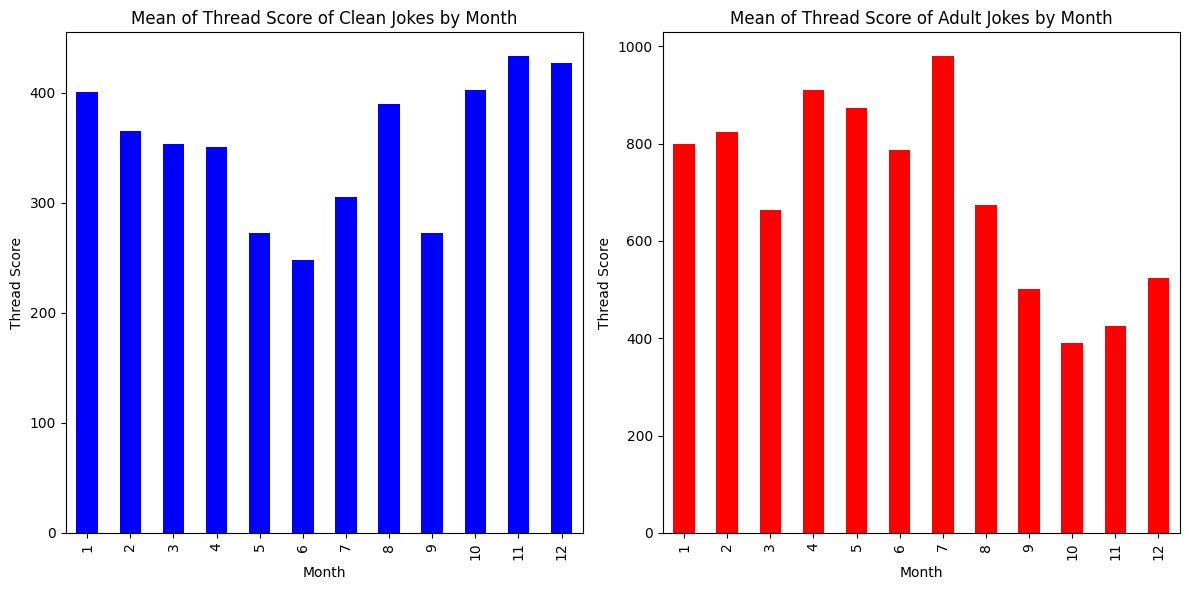

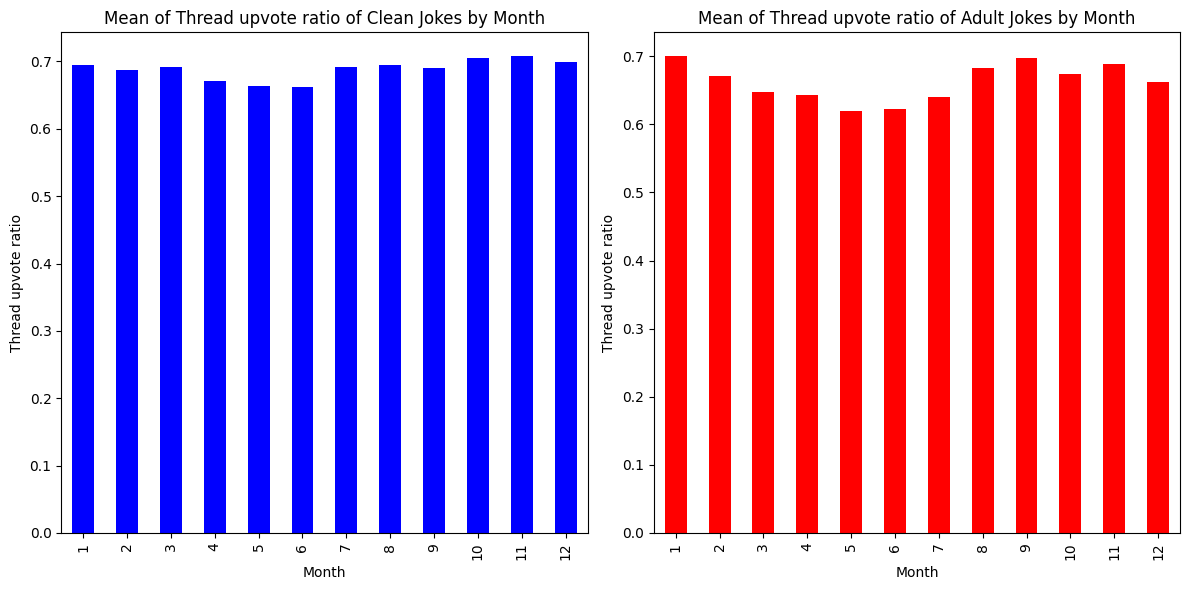

In [170]:
# For clean jokes
clean_jokes = df_jokes_slim[df_jokes_slim['thread_over_18'] == False].copy()
clean_jokes['month'] = clean_jokes['thread_created_pst'].dt.month
mean_scores_clean = clean_jokes.groupby('month')['thread_score'].mean()
mean_upvote_ratio_clean = clean_jokes.groupby('month')['thread_upvote_ratio'].mean()

# For adult jokes
adult_jokes = df_jokes_slim[df_jokes_slim['thread_over_18'] == True].copy()
adult_jokes['month'] = adult_jokes['thread_created_pst'].dt.month
mean_scores_adult = adult_jokes.groupby('month')['thread_score'].mean()
mean_upvote_ratio_adult = adult_jokes.groupby('month')['thread_upvote_ratio'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_scores_clean.plot(kind='bar', color='blue', capsize=4)
plt.title('Mean of Thread Score of Clean Jokes by Month')
plt.xlabel('Month')
plt.ylabel('Thread Score')

# Plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_scores_adult.plot(kind='bar', color='red', capsize=4)
plt.title('Mean of Thread Score of Adult Jokes by Month')
plt.xlabel('Month')
plt.ylabel('Thread Score')

# Show plot
plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_upvote_ratio_clean.plot(kind='bar', color='blue', capsize=4)
plt.title('Mean of Thread upvote ratio of Clean Jokes by Month')
plt.xlabel('Month')
plt.ylabel('Thread upvote ratio')

# Plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_upvote_ratio_adult.plot(kind='bar', color='red', capsize=4)
plt.title('Mean of Thread upvote ratio of Adult Jokes by Month')
plt.xlabel('Month')
plt.ylabel('Thread upvote ratio')

# Show plot
plt.tight_layout()
plt.show()




# Q: Is there any relation between the * day of a week* that a joke was uploaded and thread_score and thread_upvote_ratio? (adult vs clean jokes)

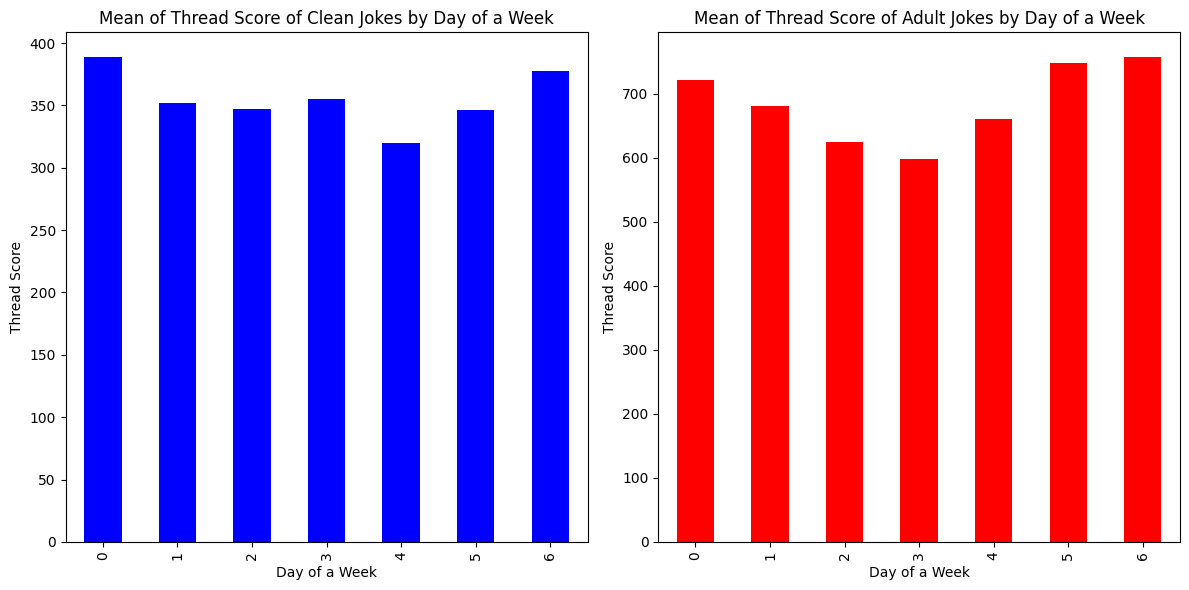

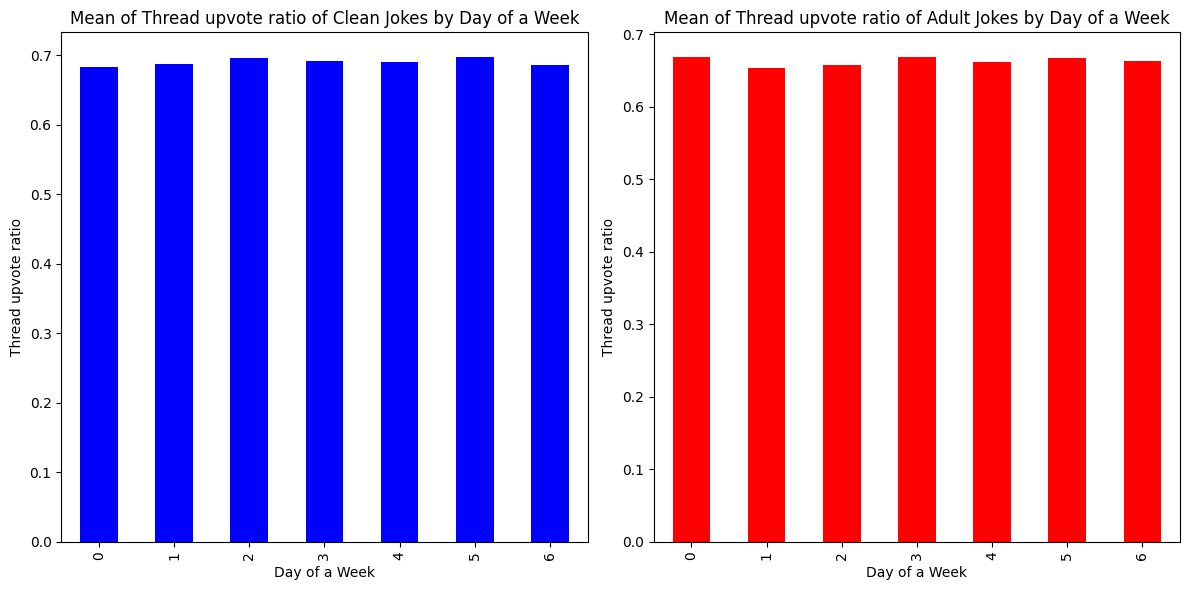

In [171]:
#clean_jokes = df_jokes_slim[df_jokes_slim['thread_over_18'] == False]
clean_jokes['weekday'] = clean_jokes['thread_created_pst'].dt.weekday
mean_scores_clean = clean_jokes.groupby('weekday')['thread_score'].mean()
mean_upvote_ratio_clean = clean_jokes.groupby('weekday')['thread_upvote_ratio'].mean()

# For adult jokes
#adult_jokes = df_jokes_slim[df_jokes_slim['thread_over_18'] == True]
adult_jokes['weekday'] = adult_jokes['thread_created_pst'].dt.weekday
mean_scores_adult = adult_jokes.groupby('weekday')['thread_score'].mean()
mean_upvote_ratio_adult = adult_jokes.groupby('weekday')['thread_upvote_ratio'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_scores_clean.plot(kind='bar', color='blue', capsize=4)
plt.title('Mean of Thread Score of Clean Jokes by Day of a Week')
plt.xlabel('Day of a Week')
plt.ylabel('Thread Score')

# Plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_scores_adult.plot(kind='bar', color='red', capsize=4)
plt.title('Mean of Thread Score of Adult Jokes by Day of a Week')
plt.xlabel('Day of a Week')
plt.ylabel('Thread Score')

# Show plot
plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_upvote_ratio_clean.plot(kind='bar', color='blue', capsize=4)
plt.title('Mean of Thread upvote ratio of Clean Jokes by Day of a Week')
plt.xlabel('Day of a Week')
plt.ylabel('Thread upvote ratio')

# Plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_upvote_ratio_adult.plot(kind='bar', color='red', capsize=4)
plt.title('Mean of Thread upvote ratio of Adult Jokes by Day of a Week')
plt.xlabel('Day of a Week')
plt.ylabel('Thread upvote ratio')

# Show plot
plt.tight_layout()
plt.show()


# Q: Is there any relation between the *hour of day* that a joke was uploaded and thread_score and thread_upvote_ratio? (adult vs clean jokes)

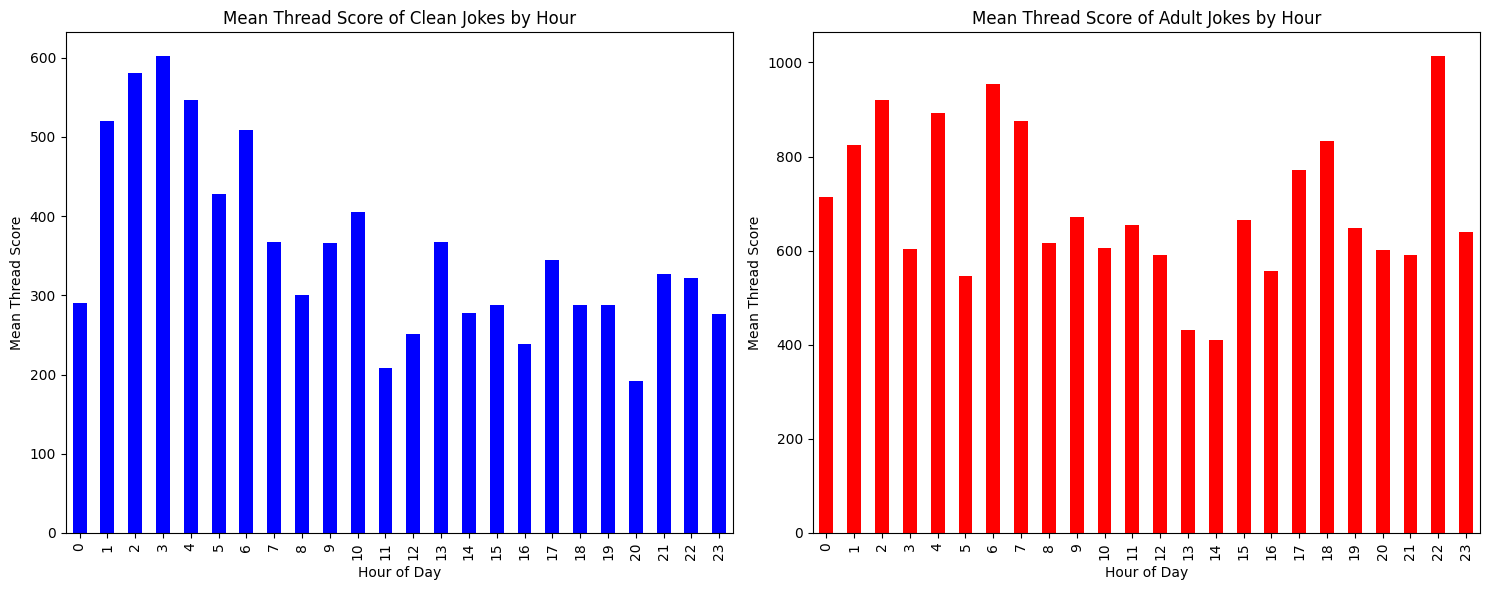

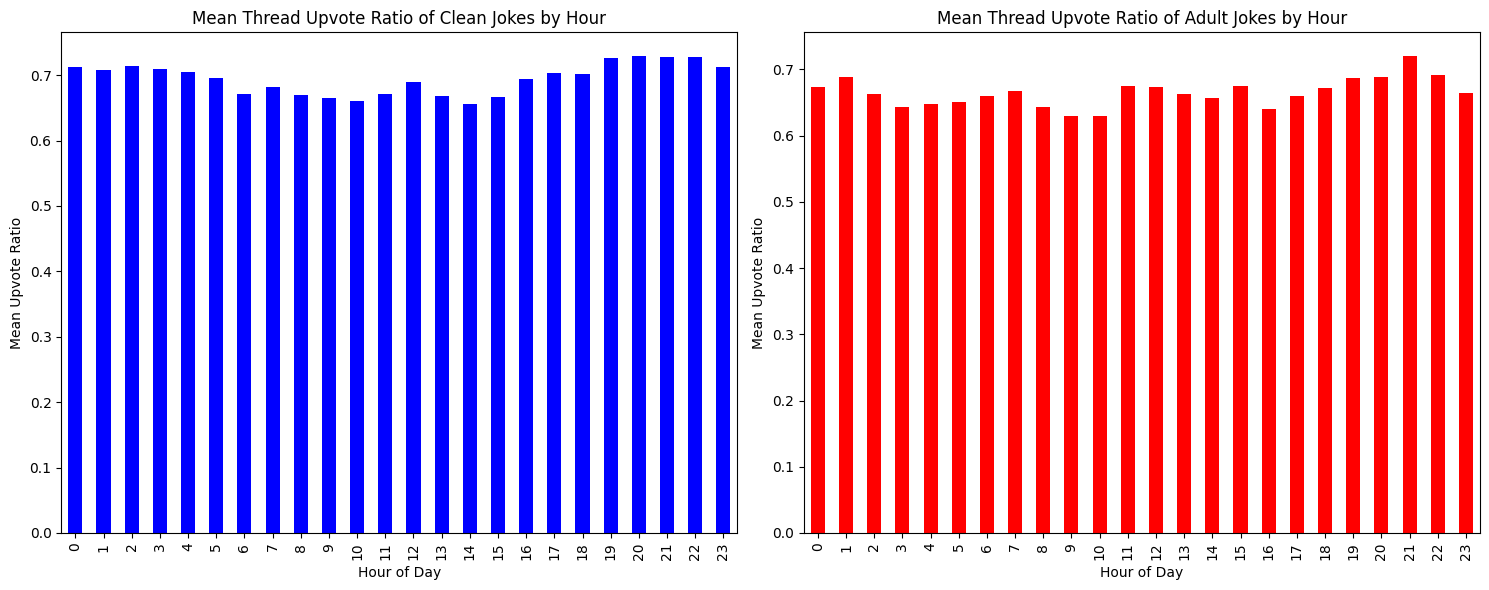

In [169]:
# For clean jokes
clean_jokes['hour'] = clean_jokes['thread_created_pst'].dt.hour
mean_scores_clean_hour = clean_jokes.groupby('hour')['thread_score'].mean()

# For adult jokes
adult_jokes['hour'] = adult_jokes['thread_created_pst'].dt.hour
mean_scores_adult_hour = adult_jokes.groupby('hour')['thread_score'].mean()

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_scores_clean_hour.plot(kind='bar', color='blue')
plt.title('Mean Thread Score of Clean Jokes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Thread Score')

# Bar plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_scores_adult_hour.plot(kind='bar', color='red')
plt.title('Mean Thread Score of Adult Jokes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Thread Score')

# Show plot
plt.tight_layout()
plt.show()


clean_jokes['hour'] = clean_jokes['thread_created_pst'].dt.hour
mean_upvote_ratio_clean_hour = clean_jokes.groupby('hour')['thread_upvote_ratio'].mean()

# For adult jokes
adult_jokes['hour'] = adult_jokes['thread_created_pst'].dt.hour
mean_upvote_ratio_adult_hour = adult_jokes.groupby('hour')['thread_upvote_ratio'].mean()

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for clean jokes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
mean_upvote_ratio_clean_hour.plot(kind='bar', color='blue')
plt.title('Mean Thread Upvote Ratio of Clean Jokes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Upvote Ratio')

# Bar plot for adult jokes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
mean_upvote_ratio_adult_hour.plot(kind='bar', color='red')
plt.title('Mean Thread Upvote Ratio of Adult Jokes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Upvote Ratio')

# Show plot
plt.tight_layout()
plt.show()




# Conclusion:
The goal of this short study was to find out if we can use thread_score and thread_upvote_ratio as a measure of joke quality. We observed large variation in thread_score with time of the day, day of the week and month of the year which can be a signal that this measure is specifically designed by Reddit to measure engagement and not correlated with the joke quality. On the other hand, thread_upvote_ratio has less dependency to time which make it more reliable measure of joke quality. In the next step of our analysis we will start looking into the text of the jokes to find out if we can use NLP techniques and try to extract features that are correlated with jokes quality, i.e. thread_upvote_ratio.

In [ ]:
df_jokes_slim.to_csv('reddit_jokes_slim_processed.csv',index=False)